In [105]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import fitter
import matplotlib.pyplot as plt
import random

In [106]:
def get_per_100_inhabitants(key:str):
    df_temp = df[key].copy()

    df_temp.set_index(df_temp.columns[0], drop=True, inplace=True)
    newIndex = df_temp.index.values
    newIndex[0] = "Jahr"
    df_temp.set_index(newIndex)

    df_temp = df_temp.transpose()

    transformed = df_temp.iloc[:,[0,5]]
    transformed.columns.name = None

    return transformed.reset_index(drop=True)

df = pd.read_excel("../Rohdaten/geburtenrate.xlsx", sheet_name= ["1960-1989", "1990-2001", "2002-2020"])


In [113]:
birthrate_1000 = get_per_100_inhabitants("1960-1989").append(get_per_100_inhabitants("1990-2001")).append(get_per_100_inhabitants("2002-2020"))

values = birthrate_1000[" je 1000 Einwohner"].values.astype("float")

values.max()

17.4

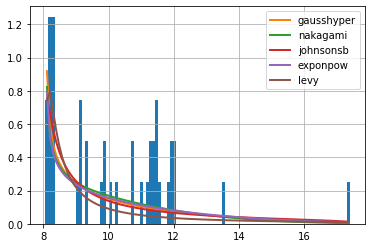

In [108]:
f = fitter.Fitter(values)

f.fit()

f.summary()

bestDist = f.get_best()

distName = list(bestDist.keys())[0]
params = f.fitted_param[distName]

obj = getattr(stats, distName)

X = obj.rvs(size = 10000, *params)

18.124610500885996